# Homework 2

### Part 1: Using the Saha and Boltzmann Equations

Important information:  
*The first row in each file is a list of $\Theta$ values, the second row is a corresponding list of $\log_{10}P_e[erg\ cm^{-3}]$ which are the required inputs for the Saha equation.*

The Saha equation defined in the homework is given by: 
$$
\log_{10}\frac{N_{II}}{N_{I}} = \log_{10}\frac{Z_{II}}{Z_{I}} + \log_{10}(2) + \frac{5}{2}\log_{10}(T)- \chi_{ion}\Theta - \log_{10}(P_e)-0.4772
$$

with $\Theta = \frac{5040}{T} $ and $\chi_{ion}= 13.595 eV$

#### 1 
*Determine the partition function for ionized and neutral H by reviewing carrol and ostlie Ch 8.1 carefully. State what your partition function ratio is and why*  

The partition function for an atom is given by
$$
Z = \sum_{j = 1}^{\infty}g_{j}e^{(E_j - E_1)/kT}
$$
with $g_j$ the degeneracy of the jth energy level, $E_j$ the energy of the jth energy level. A hydrogen ion is just a proton so $Z_{II} = 1$. The energy of the first excited state of hydrogen is $E_2 - E_1 = 10.2\ eV$ above the ground state energy. Because $10.2 eV >> kT$ for the temperature regime of stars, the Boltzmann factor $e^{(E_2 - E_1)/kT} << 1$ There for nearly all $H_I$ atoms are in the ground state which has degeneracy = 2 so $Z_1 \approx g_1 = 2$. The ratio of partition functions is 
$$
\frac{Z_{II}}{Z_{I}} = 1 / 2
$$ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in the data
sunAtmos = pd.read_table('sun-atmosphere-kamp.txt',
                         header = 0,
                         names = np.arange(0, 50, 1),
                         delim_whitespace = True).transpose()

vegaAtmos = pd.read_csv('vega-atmosphere-kamp.txt',
                        header = 0,
                        names = np.arange(0, 50, 1),
                        delim_whitespace = True).transpose()

sunAtmos.columns = ['theta', 'log10_pe']
vegaAtmos.columns = ['theta', 'log10_pe']

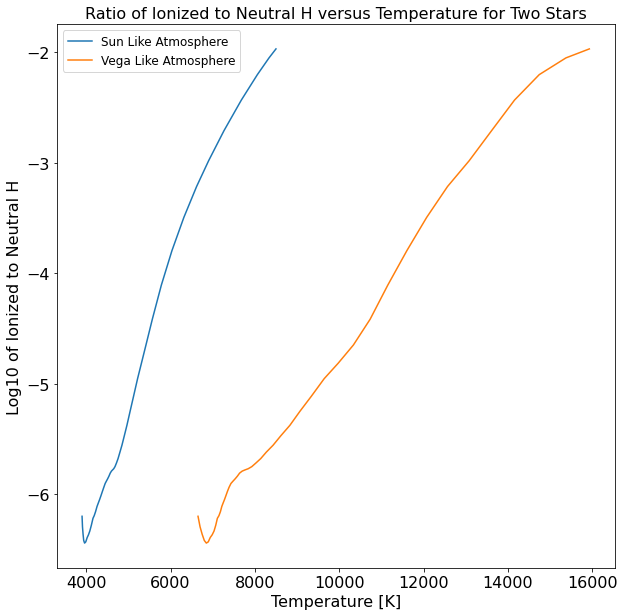

In [22]:
# Define the saha equation: 

chi_ion = 13.595 # Ionization energy of hydrogen in ground state
def saha(theta, log10_p):
    T = 5040 / theta
    return T, (np.log10(1/2) + np.log10(2) + (5/2)*np.log10(T) 
            - chi_ion*theta - log10_p - 0.4772)

# Solve the Saha equation for each layer: 
tSun, HRatioSun = saha(sunAtmos['theta'], sunAtmos['log10_pe'])
tVega, HRatioVega = saha(vegaAtmos['theta'], vegaAtmos['log10_pe'])

fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.tick_params(labelsize = 16)

ax.plot(tSun, HRatioSun, label = 'Sun Like Atmosphere')
ax.plot(tVega, HRatioSun, label = 'Vega Like Atmosphere')
ax.set_ylabel('Log10 of Ionized to Neutral H', fontsize = 16)
ax.set_xlabel('Temperature [K]', fontsize = 16)
ax.set_title('Ratio of Ionized to Neutral H '+  
             'versus Temperature for Two Stars', fontsize = 16)

ax.legend(fontsize = 12)

The above plot shows the ratio of ionized to neutral hydrogen for two stars. The temperature is calculated from the inverse temperature given in the data for the model stars. The data were generated assuming different depths within the star, therefore the temperature serves as a proxy for star depth and the above graph can be interpreted as showing the ratio of ionized to nuetral hydrogen at different depths within the stars.

### Part 2: H$\alpha$ Absorption versus temperature

#### 1

Text(0.5, 1.0, 'Occupancy of ground versus first excited state of H')

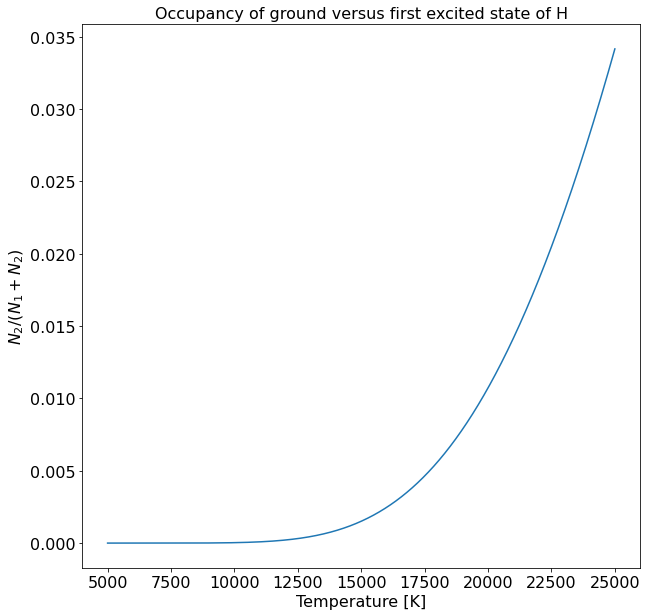

In [12]:
k = 1.380648523e-23
def boltz(g, E, T): 
    """
    E should be given in units of joules
    """
    return g*np.exp(-E/(k*T))

t = np.linspace(5000, 25000, 20000)
ratio = boltz(8, -3.4*1.6e-19, t)/(boltz(8, -3.4*1.6e-19, t)
                                   + boltz(2, -13.6*1.6e-19, t))

fig, ax = plt.subplots(1, 1, figsize = (10,10))
plt.tick_params(labelsize = 16)
ax.plot(t, ratio)
ax.set_xlabel("Temperature [K]", fontsize = 16)
ax.set_ylabel("$N_2/(N_1+N_2)$", fontsize = 16)
ax.set_title("Occupancy of ground versus first excited state of H", fontsize = 16)

The above plot shows the ratio of hydrogen in the first excited state to the total neutral hydrogen. The results are given by the Boltzmann equation which describes the probabilities of occupancy. Since for stars the number of atoms is so large, the ratio of probabilities is indistinguishable from the ratio of the number of atoms. 


We wish to calculate the total number of hydrogen atoms that are ionized $N_{II} / N_{total}$ as temperature varies from 5000 K to 25000 K. To do this I use the Saha equation (eq. 8.9 Carroll and Ostlie). The partition function for nuetral and ionized hydrogen must be determined first. For ioniozed hydrogen, the atom is just a proton so $Z_{II} = 1$. Since the energy of the first excited state is 10.2 eV above the ground state, and since 10.2 eV >> kT for the temperture regime 5000 - 25000 K, then the Boltzmann factor $e^{-(E_2 - E_1)/kT} << 1$ and therefore nearly all of the neutral hydrogen atoms are in the ground state. This makes hte partion fuunction ratio
$$
\frac{Z_{II}}{Z_{I}} = \frac{1}{2}
$$

Using this ratio and the ionization energy of hydrogen $x_{I} = 13.6\ eV$ gives the ration of ionized to neutral hydrogen $\frac{N_II}{N_I}$. 

To find relative quantity of ionized to neutral hydrogen we rearrange the ratio
$$
\frac{N_{II}}{N_{total}} = \frac{N_{II}}{N_{II}+N_{I}} = \frac{N_{II}/N_{I}}{1 + N_{II}/N_{I}}
$$

Assuming the electron pressure to be $P_e = 20\ N\ m^{-2}$ which is equal to $200\ ergs\ cm^{-3}$, we have already defined the Saha equation above. Only now I will remove the log of that equation by exponentiating the results. 

Text(0.5, 1.0, 'Relative Ionization of H to total H')

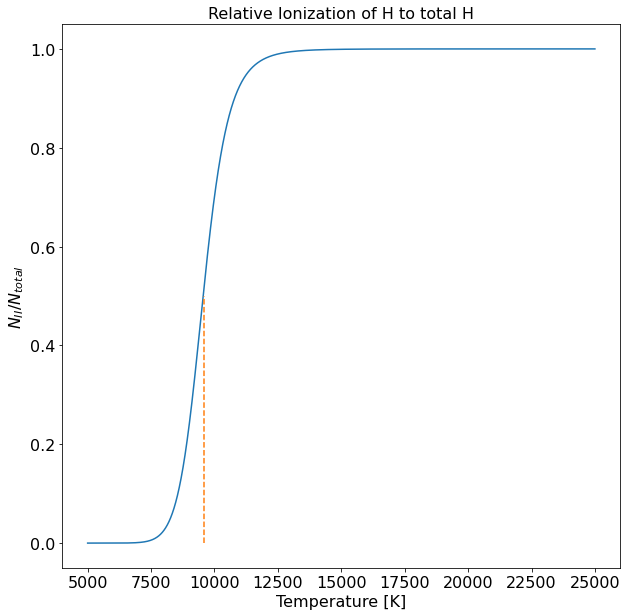

In [19]:
# Define Pe (constant) and Inverse Temperature
inverse_t = 5040/t
log10_pe = np.log10(200)

t2 , log10_NII_NI= saha(inverse_t, log10_pe)
NII_NI = 10**log10_NII_NI

NII_Ntotal = NII_NI / (1 + NII_NI)

fig, ax = plt.subplots(1, 1, figsize = (10,10))
plt.tick_params(labelsize = 16)
ax.plot(t2, NII_Ntotal)
ax.plot(np.repeat(9600, 100), 
        np.linspace(0, 0.5, 100), 
        linestyle = 'dashed')

ax.set_xlabel("Temperature [K]", fontsize = 16)
ax.set_ylabel("$N_{II}/N_{total}$", fontsize = 16)
The ax.set_title("Relative Ionization of H to total H", fontsize = 16)

The above plot shows the relative ionization of hydrogen for a range of temperatures assuming the electron pressure to be 200 ergs per cubic centimeter. The dashed line shows approximately the temperature where *half* of the total hydrogen becomes ionized, around 9600 K. 

We are now interested in the fraction of hydrogen atoms that are in the first excited state $N_2 / N_{total}$. This is obtained by combining the results of the Saha and Boltzmann equations. Because nearly all of the neutral hydrogen is either in the ground or first excited state, we make the approximation $N_1 + N_2 \approx N_I$

$$
\frac{N_2}{N_{total}} = \left(\frac{N_2 / N_1}{1 + N_2 / N_1}\right)\left(\frac{1}{1 + N_{II}/N_{I}}\right)
$$

Text(0.5, 1.0, 'Relative quantity of $N_2$ to total H')

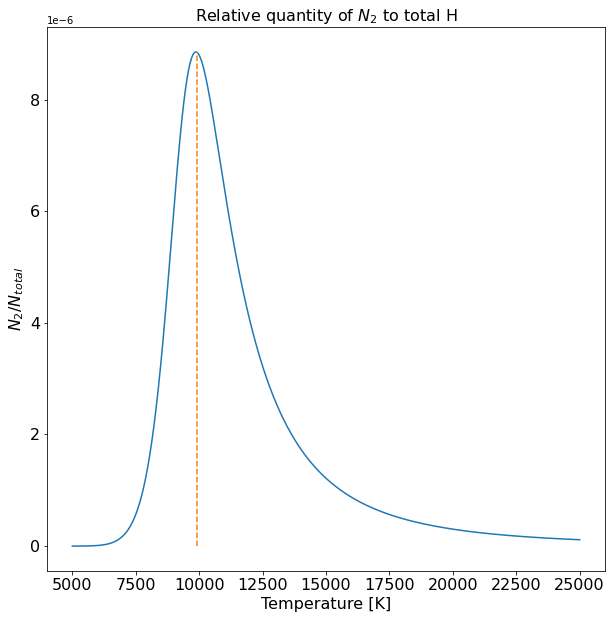

In [21]:
N2_N1 = boltz(8, -3.4*1.6e-19, t)/ boltz(2, -13.6*1.6e-19, t)

N2_Ntotal = (N2_N1 / (1 + N2_N1)) * (1 / (1 + NII_NI))

fig, ax = plt.subplots(1, 1, figsize = (10,10))
plt.tick_params(labelsize = 16)
ax.plot(t, N2_Ntotal)
ax.plot(np.repeat(9900, 100), 
        np.linspace(min(N2_Ntotal), max(N2_Ntotal), 100),
        linestyle = 'dashed')
ax.set_xlabel("Temperature [K]", fontsize = 16)
ax.set_ylabel("$N_{2}/N_{total}$", fontsize = 16)
ax.set_title("Relative quantity of $N_2$ to total H", fontsize = 16)

The above plot shows the ratio of hydrogen in the first excited state to the total amount of hydrgogen. The dashed orange line shows approximatly the peak at 9900 K. This graph illustrates why the peak in the $H\alpha$ absorption line occurs at 9520 K rather than a much higher temperature as predicted by the Boltzamann equation: at higher temperatures the Balmer lines are curtailed by the rapid ionization of hydrogen.